In [1]:
import xarray as xr

### Testing slicing on a single test file

Check opened file

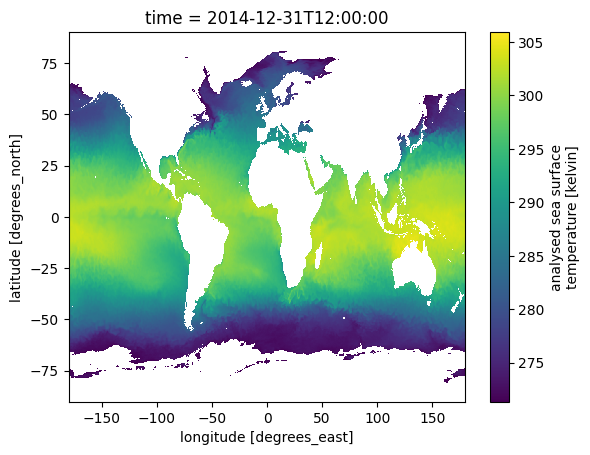

In [2]:
ds = xr.open_dataset('data/test_plot (OSTIA-UKMO)/20141231120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0_masked2.nc')
ds["analysed_sst"].plot()

Defining bounding box

In [3]:
# previous attempt, too small
# lon_min = 77.20
# lon_max = 96.20
# lat_min = 5.05
# lat_max = 24.3

lon_min = 59.20
lon_max = 96.14
lat_min = - 4.5
lat_max = 30.02

Slicing

In [4]:
ds_sliced = ds.sel(lon = slice(lon_min, lon_max), lat = slice(lat_min, lat_max))

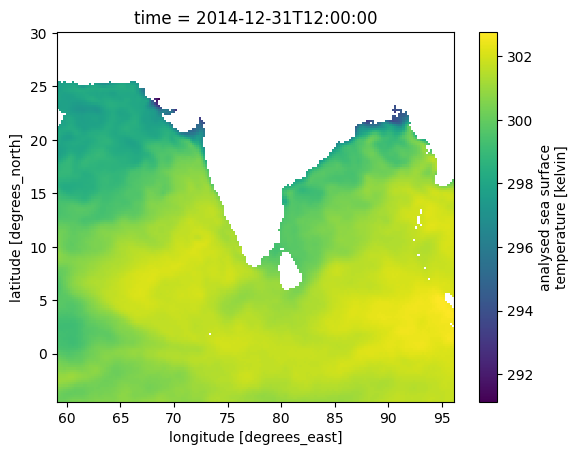

In [5]:
ds_sliced["analysed_sst"].plot()

In [30]:
ds_sliced

<xarray.Dataset>
Dimensions:       (time: 1, lat: 173, lon: 185)
Coordinates:
  * time          (time) datetime64[ns] 2014-12-31T12:00:00
  * lat           (lat) float32 -4.4 -4.2 -4.0 -3.8 -3.6 ... 29.4 29.6 29.8 30.0
  * lon           (lon) float32 59.2 59.4 59.6 59.8 60.0 ... 95.4 95.6 95.8 96.0
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

Test saving and reopening

In [31]:
ds_sliced.to_netcdf('data/test_plot (OSTIA-UKMO)/slice_mmm_yummier.nc')

In [32]:
test = xr.open_dataset('data/test_plot (OSTIA-UKMO)/slice_mmm_yummier.nc')
test

<xarray.Dataset>
Dimensions:       (time: 1, lat: 173, lon: 185)
Coordinates:
  * time          (time) datetime64[ns] 2014-12-31T12:00:00
  * lat           (lat) float32 -4.4 -4.2 -4.0 -3.8 -3.6 ... 29.4 29.6 29.8 30.0
  * lon           (lon) float32 59.2 59.4 59.6 59.8 60.0 ... 95.4 95.6 95.8 96.0
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

### Applying slice to all files in dataset

In [10]:
import os

input_folder = 'data/masked_dataset/'
output_folder = 'data/final_sliced_1/'

files = [f for f in os.listdir(input_folder)]

In [11]:
# final bounding box
lon_min = 59.20
lon_max = 96.14
lat_min = - 4.5
lat_max = 30.02

In [12]:
for file in files:
    in_path = os.path.join(input_folder, file)
    out_file = file.replace('_masked2.nc', '_sliced.nc')
    out_path = os.path.join(output_folder, out_file)
    
    ds = xr.open_dataset(in_path)
    ds_sliced = ds.sel(lon = slice(lon_min, lon_max), lat = slice(lat_min, lat_max))
    
    ds_sliced.to_netcdf(out_path, encoding={'analysed_sst': {'zlib': True, 'complevel': 4}})
    
    ds.close()
print("done")

done
